In [19]:
from prophet import Prophet
import pandas as pd

In [20]:
d=pd.read_excel(r"C:\Users\prernagupta\Desktop\kbot-us.xlsx")


In [21]:
d

,start_date,full_stock_index,yhat,new_season_index,yhat.1,freshness_index,markdown_index,fashion_leaders_index,new_season_index_raw,trending_index,...,trend,base,fsi_yhat_lower,fsi_yhat,fsi_yhat_upper,fsi_pivot_points,nsi_yhat_lower,nsi_yhat,nsi_yhat_upper,nsi_pivot_points
0,2016-01-04,0.020172,0.020595,0.014712,0.019689,-0.052436,0.890276,0.330065,0.012544,0.807608,...,knit_bottoms_super_us,Apparel,0.017673,0.019028,0.020396,"['2017-04-03', '2018-01-15', '2020-08-31']",0.014417,0.018949,0.024266,"['2016-01-11', '2019-12-09']"
1,2016-01-11,0.020249,0.020951,0.016414,0.019280,-0.031777,0.893776,0.336124,0.018067,0.796094,...,knit_bottoms_super_us,Apparel,0.017687,0.019139,0.020612,"['2017-04-03', '2018-01-15', '2020-08-31']",0.013684,0.018714,0.023485,"['2016-01-11', '2019-12-09']"
2,2016-01-18,0.020272,0.021206,0.017493,0.018965,-0.009612,0.897070,0.341972,0.016891,0.785159,...,knit_bottoms_super_us,Apparel,0.017815,0.019278,0.020791,"['2017-04-03', '2018-01-15', '2020-08-31']",0.013762,0.018353,0.023440,"['2016-01-11', '2019-12-09']"
3,2016-01-25,0.020241,0.021435,0.018028,0.018628,0.014059,0.900160,0.347610,0.017027,0.774802,...,knit_bottoms_super_us,Apparel,0.018088,0.019411,0.020787,"['2017-04-03', '2018-01-15', '2020-08-31']",0.012907,0.017857,0.022716,"['2016-01-11', '2019-12-09']"
4,2016-02-01,0.020267,0.021677,0.018096,0.018200,0.039236,0.903044,0.353037,0.020050,0.765023,...,knit_bottoms_super_us,Apparel,0.018061,0.019504,0.021012,"['2017-04-03', '2018-01-15', '2020-08-31']",0.012100,0.017248,0.022392,"['2016-01-11', '2019-12-09']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2021-06-21,0.036863,0.019786,0.030954,0.034640,0.392138,1.008414,0.418035,0.033006,0.916397,...,knit_bottoms_super_us,Apparel,0.034506,0.035890,0.037347,"['2017-04-03', '2018-01-15', '2020-08-31']",0.031280,0.036083,0.040932,"['2016-01-11', '2019-12-09']"
286,2021-06-28,0.036593,0.019952,0.033439,0.035931,0.383108,1.019264,0.409001,0.030753,0.967069,...,knit_bottoms_super_us,Apparel,0.034852,0.036188,0.037589,"['2017-04-03', '2018-01-15', '2020-08-31']",0.032189,0.037145,0.042028,"['2016-01-11', '2019-12-09']"
287,2021-07-05,0.036561,0.020529,0.036770,0.037406,0.373458,1.030473,0.399620,0.033568,1.025295,...,knit_bottoms_super_us,Apparel,0.034972,0.036498,0.037943,"['2017-04-03', '2018-01-15', '2020-08-31']",0.033505,0.038363,0.043191,"['2016-01-11', '2019-12-09']"
288,2021-07-12,0.036219,0.020366,0.041038,0.038787,0.363188,1.042043,0.389891,0.033458,1.091075,...,knit_bottoms_super_us,Apparel,0.035257,0.036823,0.038213,"['2017-04-03', '2018-01-15', '2020-08-31']",0.034666,0.039693,0.044741,"['2016-01-11', '2019-12-09']"


In [22]:
d=d.iloc[:, [0,3]]

In [23]:
df=d.dropna()
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [24]:
df

,ds,y
0,2016-01-04,0.014712
1,2016-01-11,0.016414
2,2016-01-18,0.017493
3,2016-01-25,0.018028
4,2016-02-01,0.018096
...,...,...
285,2021-06-21,0.030954
286,2021-06-28,0.033439
287,2021-07-05,0.036770
288,2021-07-12,0.041038


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


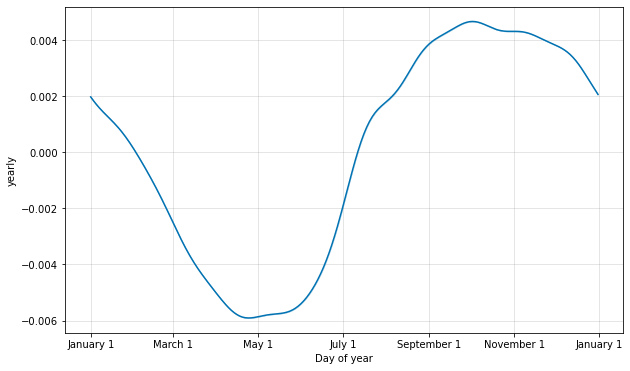

In [25]:
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


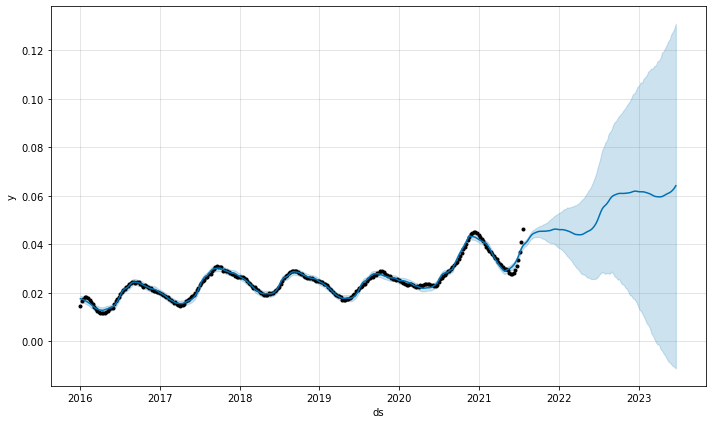

In [28]:
#logitsic, caps floors 


m = Prophet(yearly_seasonality=True, changepoint_range=1.0  ,changepoint_prior_scale=0.5)
# define the model
# fit the model
m.fit(df)
q=m.predict(df)
future = m.make_future_dataframe(periods=100, freq='W')

fcst = m.predict(future)
fig = m.plot(fcst)

In [29]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,0.016349,0.016266,0.018739,0.016349,0.016349,0.001150,0.001150,0.001150,0.001150,0.001150,0.001150,0.0,0.0,0.0,0.017499
1,2016-01-11,0.016448,0.016032,0.018599,0.016448,0.016448,0.000861,0.000861,0.000861,0.000861,0.000861,0.000861,0.0,0.0,0.0,0.017309
2,2016-01-18,0.016547,0.015878,0.018436,0.016547,0.016547,0.000557,0.000557,0.000557,0.000557,0.000557,0.000557,0.0,0.0,0.0,0.017104
3,2016-01-25,0.016646,0.015532,0.017987,0.016646,0.016646,0.000160,0.000160,0.000160,0.000160,0.000160,0.000160,0.0,0.0,0.0,0.016806
4,2016-02-01,0.016746,0.015231,0.017675,0.016746,0.016746,-0.000320,-0.000320,-0.000320,-0.000320,-0.000320,-0.000320,0.0,0.0,0.0,0.016425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2023-05-21,0.066372,-0.008776,0.124447,-0.003424,0.129749,-0.005071,-0.005071,-0.005071,-0.005071,-0.005071,-0.005071,0.0,0.0,0.0,0.061301
386,2023-05-28,0.066672,-0.009479,0.126576,-0.004429,0.131103,-0.004938,-0.004938,-0.004938,-0.004938,-0.004938,-0.004938,0.0,0.0,0.0,0.061734
387,2023-06-04,0.066971,-0.010215,0.127586,-0.005494,0.132446,-0.004633,-0.004633,-0.004633,-0.004633,-0.004633,-0.004633,0.0,0.0,0.0,0.062339
388,2023-06-11,0.067271,-0.010575,0.128885,-0.006623,0.133432,-0.004149,-0.004149,-0.004149,-0.004149,-0.004149,-0.004149,0.0,0.0,0.0,0.063122


In [30]:
fcst.to_csv(r'C:\Users\prernagupta\Desktop\knitbot-us-nsi-v1.csv')

In [31]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')


INFO:prophet:Making 6 forecasts with cutoffs between 2018-01-31 00:00:00 and 2020-07-19 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

In [32]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,0.000002,0.001314,0.000982,0.037282,0.031381,0.038152,0.322581
1,37 days,0.000002,0.001297,0.000954,0.036395,0.030351,0.037236,0.354839
2,39 days,0.000002,0.001302,0.000969,0.036900,0.030351,0.037751,0.354839
3,40 days,0.000002,0.001413,0.001053,0.040751,0.031381,0.041948,0.354839
4,41 days,0.000002,0.001497,0.001138,0.044423,0.031579,0.045861,0.322581


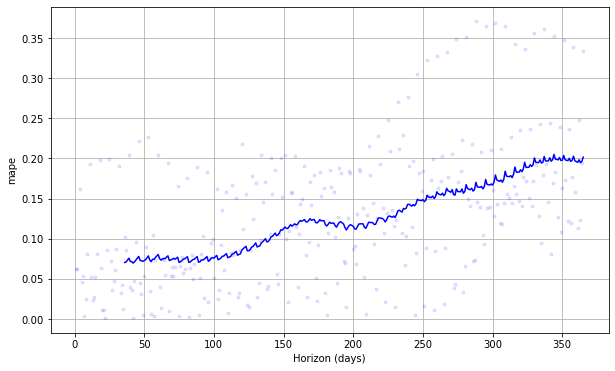

In [78]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
